In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy.optimize import curve_fit
import os

In [4]:
list_of_files = []
for file in os.listdir('.'):
    if file.endswith('csv'):
        list_of_files.append(file)
list_of_files

['20151203_143557.csv', '20151203_144429.csv']

In [5]:
data = np.loadtxt(list_of_files[1], delimiter=',', skiprows=2)

In [6]:
data[:5]

array([[  4.06777748e+09,   4.87000000e+02],
       [  4.06777759e+09,   4.07000000e+02],
       [  4.06777770e+09,   1.53000000e+02],
       [  4.06777781e+09,   9.86000000e+02],
       [  4.06777792e+09,   7.96000000e+02]])

In [7]:
data[:,0] -= data[0,0]

In [8]:
data[:5]

array([[   0.,  487.],
       [ 110.,  407.],
       [ 220.,  153.],
       [ 330.,  986.],
       [ 440.,  796.]])

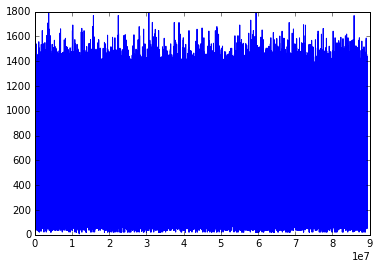

In [10]:
plt.plot(data[:,0], data[:,1])

In [19]:
data[:,0] /= 1000000.

In [20]:
data[:5]

array([[  0.00000000e+00,   4.87000000e+02],
       [  1.10000000e-04,   4.07000000e+02],
       [  2.20000000e-04,   1.53000000e+02],
       [  3.30000000e-04,   9.86000000e+02],
       [  4.40000000e-04,   7.96000000e+02]])

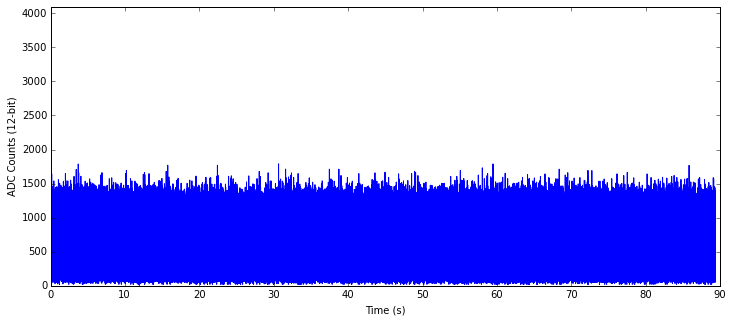

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data[:,0], data[:,1])
ax.set_ylim(0,4095)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

Very noisy data. Let's do a moving average with a window size of 500 pts * 110 $\mu$s per point = 55 ms

In [25]:
N = 500
data_conv500 = np.convolve(data[:,1], np.ones((N,))/N, mode='valid')

In [27]:
data_conv500.shape

(811613,)

In [28]:
data.shape

(812112, 2)

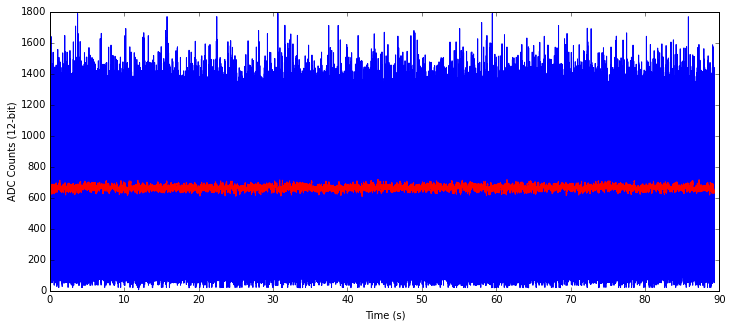

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data[:,0], data[:,1])
ax.plot(data[:len(data_conv500),0], data_conv500, 'r')
#ax.set_ylim(0,4095)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

Nothing promising. Let's zoom in on the first section just to take a closer look.

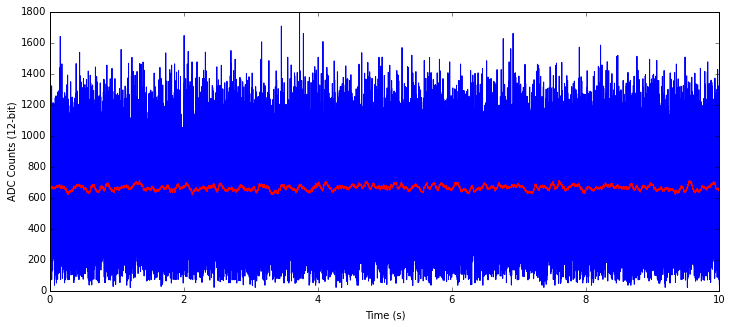

In [31]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data[:,0], data[:,1])
ax.plot(data[:len(data_conv500),0], data_conv500, 'r')
#ax.set_ylim(0,4095)
ax.set_xlim(0,10)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

# Let's move to the last data file

In [2]:
list_of_files = []
for file in os.listdir('.'):
    if file.endswith('csv'):
        list_of_files.append(file)
list_of_files

['20151203_143557.csv', '20151203_144429.csv', '20151203_145819.csv']

In [3]:
data2 = np.loadtxt(list_of_files[2], delimiter=',', skiprows=2)
data2[:,0] -= data2[0,0]
data2[:,0] /= 1000000.
data2[:5]

array([[  0.00000000e+00,   8.85000000e+02],
       [  1.10000000e-04,   3.97000000e+02],
       [  2.20000000e-04,   3.17000000e+02],
       [  3.30000000e-04,   7.80000000e+02],
       [  4.40000000e-04,   8.63000000e+02]])

In [7]:
N = 500
data2_conv500 = np.convolve(data2[:,1], np.ones((N,))/N, mode='valid')
data2_conv500.shape

(7067893,)

In [6]:
data2.shape

(7068392, 2)

The data is too big to plot in a single graph so let's go through it in intervals of 10% of the total temporal range.

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


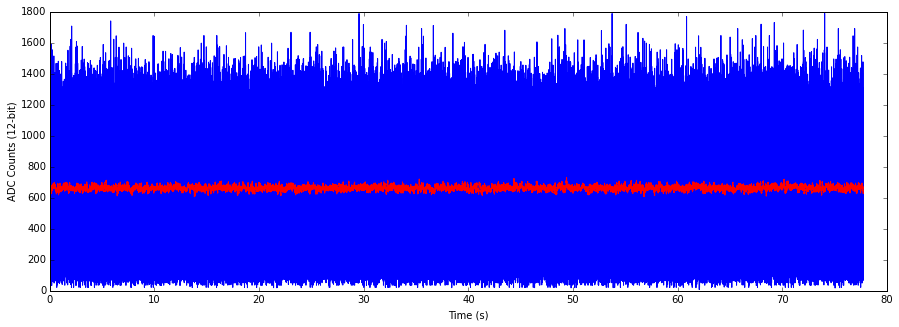

In [19]:
nlimitlower = data2.shape[0]/10 * 0
nlimitupper = data2.shape[0]/10 * 1
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


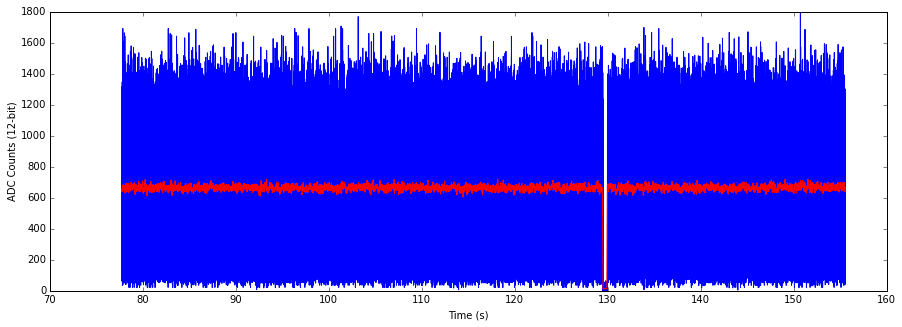

In [17]:
nlimitlower = data2.shape[0]/10 * 1
nlimitupper = data2.shape[0]/10 * 2
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


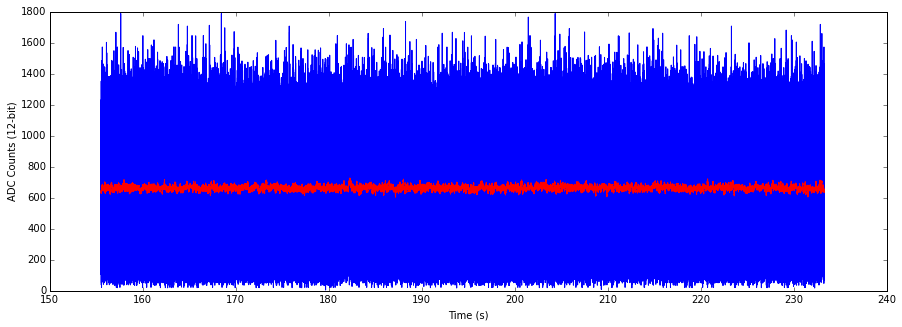

In [18]:
nlimitlower = data2.shape[0]/10 * 2
nlimitupper = data2.shape[0]/10 * 3
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


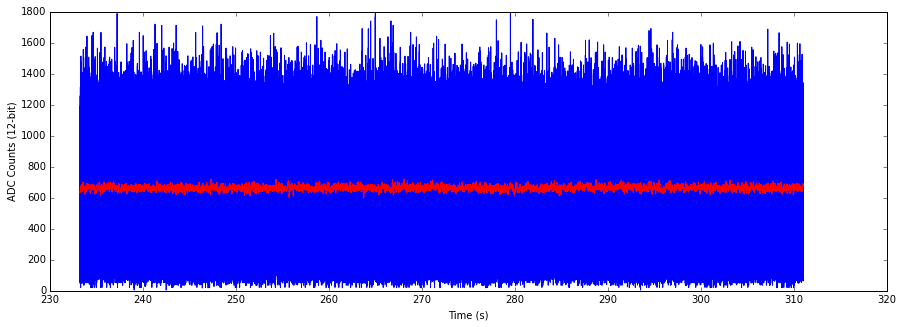

In [20]:
nlimitlower = data2.shape[0]/10 * 3
nlimitupper = data2.shape[0]/10 * 4
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


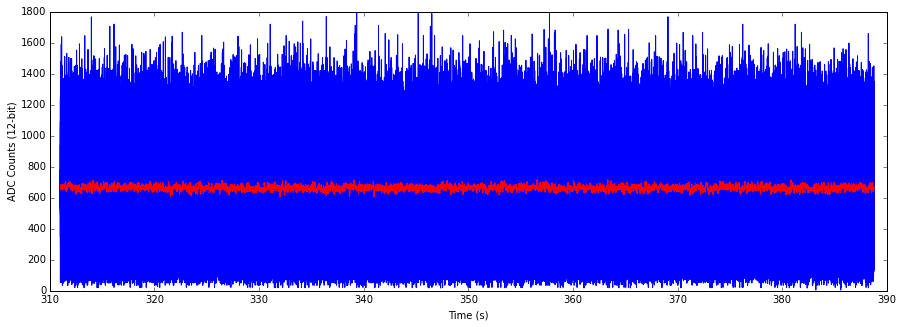

In [21]:
nlimitlower = data2.shape[0]/10 * 4
nlimitupper = data2.shape[0]/10 * 5
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


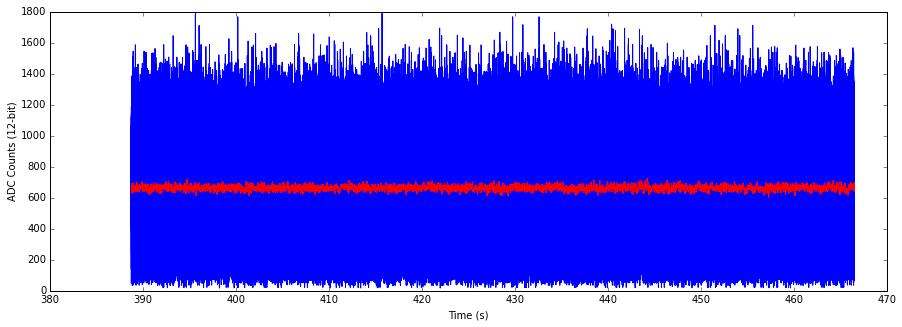

In [22]:
nlimitlower = data2.shape[0]/10 * 5
nlimitupper = data2.shape[0]/10 * 6
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


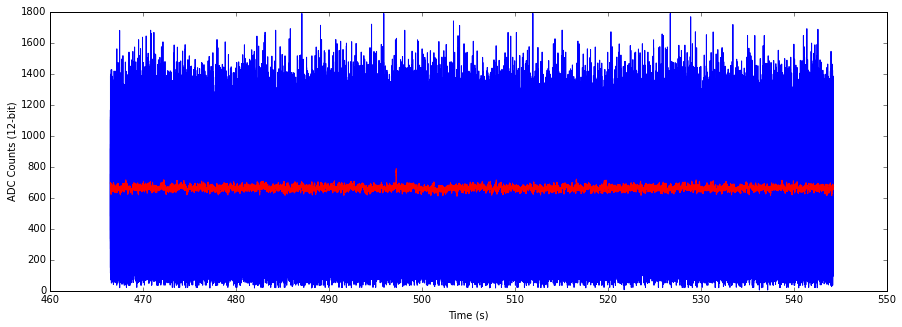

In [23]:
nlimitlower = data2.shape[0]/10 * 6
nlimitupper = data2.shape[0]/10 * 7
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

__Looks like there might be a small peak in the above graph at about 497 seconds.__

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


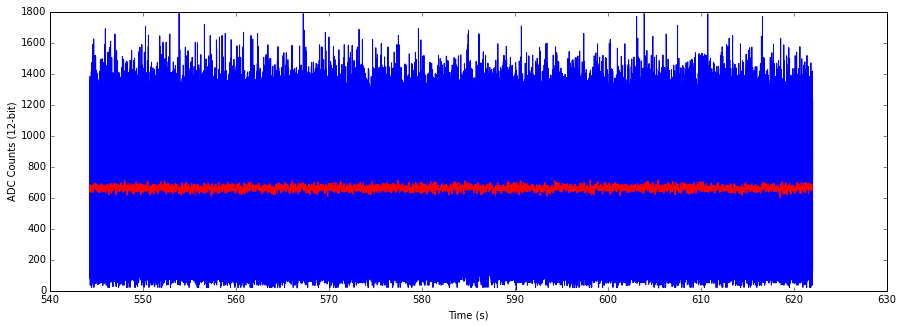

In [24]:
nlimitlower = data2.shape[0]/10 * 7
nlimitupper = data2.shape[0]/10 * 8
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


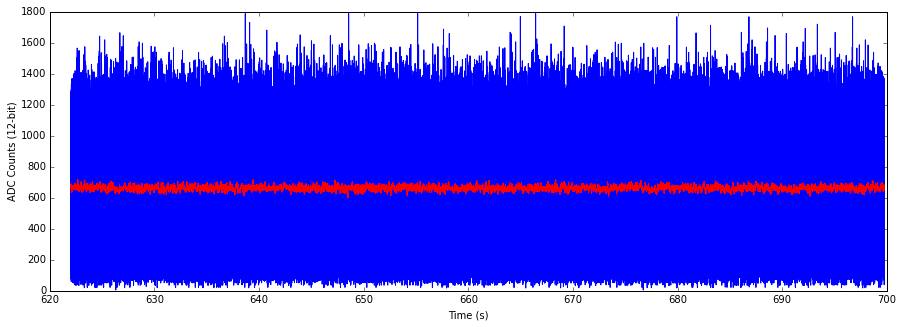

In [25]:
nlimitlower = data2.shape[0]/10 * 8
nlimitupper = data2.shape[0]/10 * 9
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


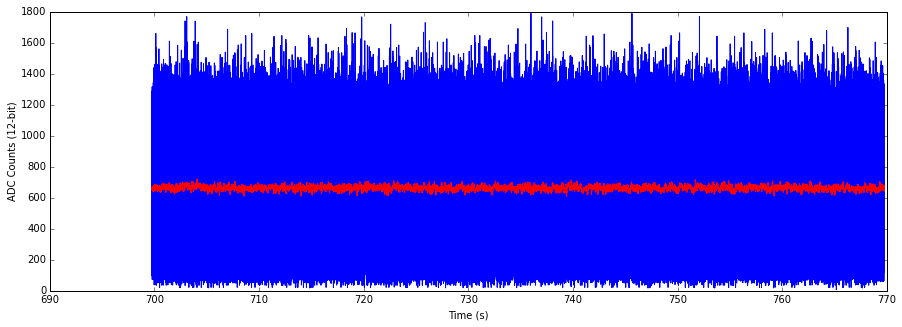

In [26]:
nlimitlower = data2.shape[0]/10 * 9
nlimitupper = data2.shape[0]/10 * 9.9
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_ylim(0,1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

## Let's zoom in on the one small peak in the above data

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


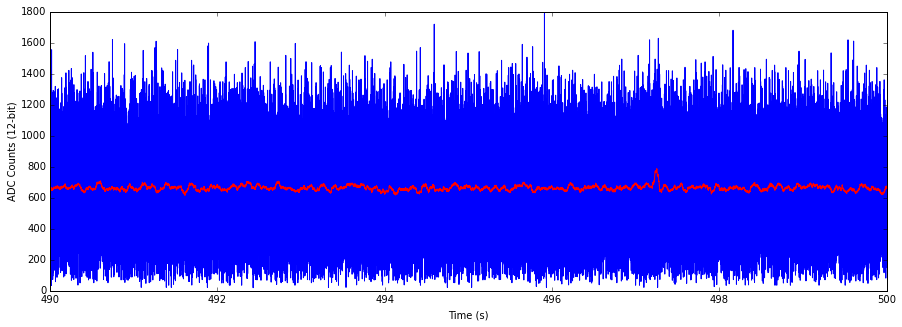

In [27]:
nlimitlower = data2.shape[0]/10 * 6
nlimitupper = data2.shape[0]/10 * 7
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_xlim(490, 500)
ax.set_ylim(0, 1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

Taking a closer look:

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


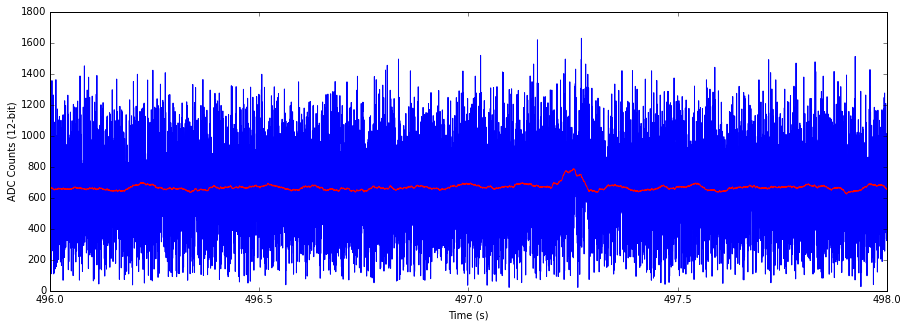

In [28]:
nlimitlower = data2.shape[0]/10 * 6
nlimitupper = data2.shape[0]/10 * 7
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.set_xlim(496, 498)
ax.set_ylim(0, 1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

Let's change the length of the moving average & replot:

In [29]:
N = 200
data2_conv200 = np.convolve(data2[:,1], np.ones((N,))/N, mode='valid')
data2_conv200.shape

(7068193,)

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


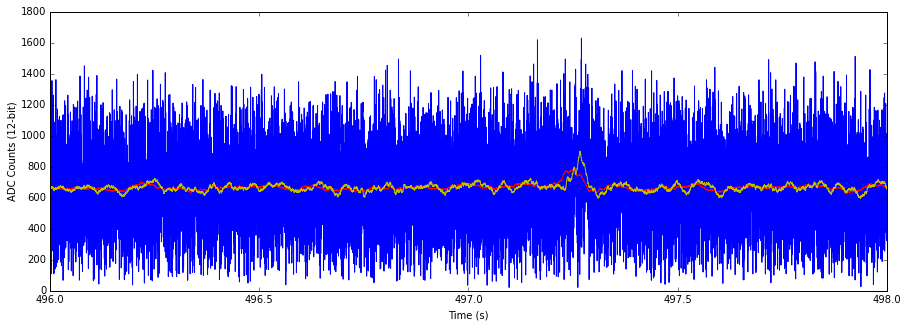

In [31]:
nlimitlower = data2.shape[0]/10 * 6
nlimitupper = data2.shape[0]/10 * 7
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data2[nlimitlower:nlimitupper,0], data2[nlimitlower:nlimitupper,1])
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv500[nlimitlower:nlimitupper], 'r')
ax.plot(data2[nlimitlower:nlimitupper,0], data2_conv200[nlimitlower:nlimitupper], 'y')
ax.set_xlim(496, 498)
ax.set_ylim(0, 1800)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ADC Counts (12-bit)')

Hmm, not sure that this is a dectection event. I have no idea what was going on with the sample and when the various injection and separation voltages were applied.